In [1]:
import pandas as pd
import numpy as np
import heapq

# 0 Graph Basics

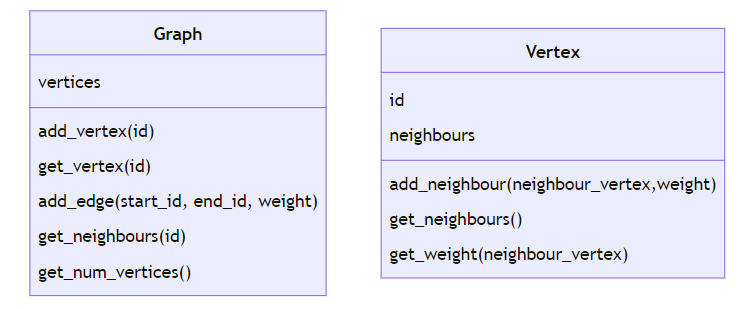

### Vertex 

The class `Vertex` has the following attributes:
- `id_`: to identify each vertex. This is of String data type.
- `neighbours`: which is a Dictionary where the keys are the neighbouring `Vertex` object instances that are connected to the current Vertex and the values are the weights of the edge between the current Vertex and the neighbouring vertices. 

The class has the following methods:
- `__init__(self, id_)`: which is used to initialized the attribute `id_`. By default, `id_` is set to an empty String . The attribute `neighbours` is always set to an empty dictionary.
- `add_neighbour(self, nbr_vertex, weight)`: which adds a neighbouring Vertex to the current Vertex. The second argument provides the weight of the edge between the current Vertex and the newly added neighbouring Vertex. By default, `weight` is `0`.
- `get_vertex_neigbours(self)`: which returns all the Vertices connected to the current Vertex as a list. The elements of the output list are of `Vertex` object instances.
- `get_weight(self, neighbour)`: which returns the weight of the requested neighbour. It should return `None` if the requested neighbour is not found.
- `__eq__(self, other)`: which returns true if the id of the current vertex object is the same as the `other` vertex's id. 
- `__lt__(self, other)`: which returns true if the id of the current vertex object is less than the `other` vertex's id.
- `__hash__(self)`: which calls the `hash()` function on `id_` and returns it. This allows the object to be a dictionary key. This is provided for you.
- `__str__(self)`: This method should return the id of the current vertex and a list of `id_`s of the neighbouring vertices, like `Vertex 2 is connected to: 3, 4, 5` .

In [2]:
class Vertex:
    def __init__(self, id_=""):
        self.id_ = id_
        self.neighbours = {}
    
    def add_neighbour(self, nbr_vertex, weight=0):
        self.neighbours[nbr_vertex] = weight
    
    def get_vertex_neighbours(self):
        return list(self.neighbours.keys())
    
    def get_weight(self, neighbour):
        if neighbour in self.neighbours.keys():
            return self.neighbours[neighbour]
        return None
    
    def __eq__(self, other):
        if self.id_ == other.id_: 
            return True
        return False

    def __lt__(self, other):
        if self.id_ < other.id_:
            return True
        return False

    def __hash__(self):
        return hash(self.id_)
    
    def __str__(self):
        my_string = f"Vertex {self.id_} is connected to: "
        my_neighbours = []
        for vertex in self.get_vertex_neighbours():
            my_neighbours.append(vertex.id_)
        my_string += ", ".join(my_neighbours)
        return my_string

In [3]:
v1 = Vertex("1")
v2 = Vertex("2")
v1.add_neighbour(v2, 3)
print(v1)

Vertex 1 is connected to: 2


In [4]:
v = Vertex()
v.add_neighbour(1)
v.add_neighbour(2)
v.add_neighbour(6)
v.get_vertex_neighbours()

v1 = Vertex("1")
assert v1.id_ == "1" and len(v1.neighbours) == 0
v2 = Vertex("2")
v1.add_neighbour(v2)
assert v1.get_vertex_neighbours()[0].id_ == "2" and v1.neighbours[v1.get_vertex_neighbours()[0]] == 0
v3 = Vertex("3")
v1.add_neighbour(v3, 3)
assert v1.get_weight(v3) == 3
v4 = Vertex("4")
assert v1.get_weight(v4) == None
assert v1 < v2
assert v1 != v2
assert str(v1) == "Vertex 1 is connected to: 2, 3"

### Graph

The class has the following attribute:
- `vertices`: which is a *dictionary* of Vertices. The keys are the `id`s of the Vertices and the values are `Vertex` object instances.

The class has the following property:
- `num_vertices`: which is a *computed* property that returns the number of vertices in the graph.

The class also has the following methods:
- `__init__(self)`: which initializes the graph with an empty dictionary.
- `_create_vertex(self, id_)`: which creates a new `Vertex` object with a given `id_`. This method is never called directly and is only used by `add_vertex(id_)`.
- `add_vertex(self, id_)`: which creates a new `Vertex` object, adding it into the dictionary `vertices`. The argument `id_` is a String. This method should call `_create_vertex(id_)`.
- `get_vertex(self, id_)`: which returns the `Vertex` object instance of the requested `id_`. The method should return `None` if the requested `id_` cannot be found. The argument `id_` is a String.
- `add_edge(start_v, end_v)`: which creates an edge from one Vertex to another Vertex. The arguments are the `id_`s of the two vertices and are both Strings.
- `get_neighbours(self, id_)`: which returns a list of `id_`s all the neighbouring vertices (of the specified Vertex `id_`). It should return `None` if `id_` cannot be found. The argument `id_` is a String and the elements of the output list are of `str` data type. 
- `__contains__(self, id_)`: which returns either `True` or `False` depending on whether the graph contains the specified Vertex's `id_`. The argument `id_` is a String.

In [5]:
class Graph:
    def __init__(self):
        self.vertices = {}
        
    def _create_vertex(self, id_):
        return Vertex(id_)

    def add_vertex(self, id_):
        self.vertices[id_] = self._create_vertex(id_)

    def get_vertex(self, id_):
        if id_ in self.vertices.keys():
            return self.vertices[id_]
        return None
        
    def add_edge(self, start_v, end_v, weight=0):
        if not start_v in self.vertices: 
            self.add_vertex(start_v)
        if not end_v in self.vertices: 
            self.add_vertex(end_v)
        v_start = self.vertices[start_v]
        v_end = self.vertices[end_v]
        v_start.add_neighbour(v_end)

    def get_neighbours(self, id_):
        vertex = self.get_vertex(id_)
        if vertex:
            return [neighbour.id_ for neighbour in vertex.get_vertex_neighbours()]
        return None
 
    def __contains__(self, id_):
        return (id_ in self.vertices)
    
    def __iter__(self):
        for k,v in self.vertices.items():
            yield v 

    @property        
    def num_vertices(self):
        return len(self.vertices)

# 1 Loading a Sample Dataset

### BOM & Routing

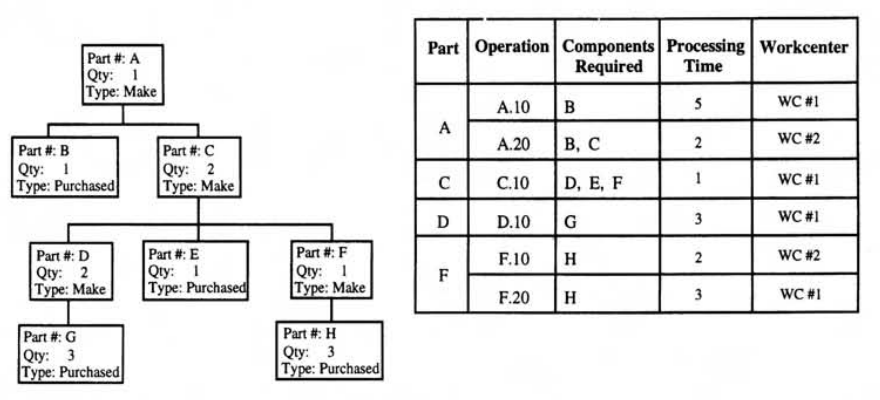

In [6]:
df = pd.DataFrame({
    "part": ['A', 'A', 'C', 'D', 'F', 'F'], 
    "operation": ['A.10', 'A.20', 'C.10', 'D.10', 'F.10', 'F.20'],
    'operation_id': [10, 20, 10, 10, 10, 20],
    "components_required": [['B'], ['B', 'C'], ['D', 'E', 'F'], ['G'], ['H'], ['H']],
    "processing_time": [5, 2, 1, 3, 2, 3],
    "workcenter": [1, 2, 1, 1, 2, 1]
})

display(df)

,part,operation,operation_id,components_required,processing_time,workcenter
0,A,A.10,10,[B],5,1
1,A,A.20,20,"[B, C]",2,2
2,C,C.10,10,"[D, E, F]",1,1
3,D,D.10,10,[G],3,1
4,F,F.10,10,[H],2,2
5,F,F.20,20,[H],3,1


# 2 Converting the BOM into an Operation Network

## 2.2 Using OOP + Optimizing the Algorithm

In [7]:
# df = pd.DataFrame({
#     "part": ['A', 'A', 'C', 'D', 'F', 'F', 'F'], 
#     "operation": ['A.10', 'A.20', 'C.10', 'D.10', 'F.10', 'F.20', 'F.30'],
#     'operation_id': [10, 20, 10, 10, 10, 20, 30],
#     "components_required": [['B'], ['B', 'C'], ['D', 'E', 'F'], ['G'], ['H'], ['H'], ['H']],
#     "processing_time": [5, 2, 1, 3, 2, 3, 4],
#     "workcenter": [1, 2, 1, 1, 2, 1, 3]
# })

df = pd.DataFrame({
    "part": ['A', 'A', 'C', 'D', 'F', 'F'], 
    "operation": ['A.10', 'A.20', 'C.10', 'D.10', 'F.10', 'F.20'],
    'operation_id': [10, 20, 10, 10, 10, 20],
    "components_required": [['B'], ['B', 'C'], ['D', 'E', 'F'], ['G'], ['H'], ['H']],
    "processing_time": [5, 2, 1, 3, 2, 3],
    "workcenter": [1, 2, 1, 1, 2, 1]
})

df['predecessor_operations'] = None
for i in range(len(df)): 
    predecessors = df.loc[i, 'components_required']
    predecessor_operations = []
    for predecessor in predecessors: 
        if predecessor in df['part'].unique():
            predecessor_operations += df['operation'].loc[(df['part']==predecessor)].tolist()
    df.at[i, 'predecessor_operations'] = predecessor_operations
    # TODO: fix the predecessor_operation appendage for part C. 
    # operation F.20 (more final) should be appended to C instead of operation F.10
    # the code is currently unable to differentiate between F.10 and F.20 and takes the first available item

# display(df)

for part in df['part'].unique(): 
    df_operations = df.loc[df['part'] == part]
    while(len(df_operations)) > 1: 
        max_operation_idx_1 = df_operations['operation_id'].idxmax()
        df_operations = df_operations.drop(index=max_operation_idx_1)
        max_operation_idx_2 = df_operations['operation_id'].idxmax()
        predecessor_operation = df.loc[max_operation_idx_2, 'operation']
        df.at[max_operation_idx_1,'predecessor_operations'].append(predecessor_operation)
display(df)

g = Graph()
for i in range(len(df)):
    end_vertex = df.loc[i, 'operation']
    for predecessor in df.loc[i,'predecessor_operations']: 
        start_vertex = predecessor
        # print(f"{type(start_vertex)}, {type(end_vertex)}")
        # print(f"({start_vertex}, {end_vertex})")
        g.add_edge(start_vertex, end_vertex)

for vertex in g:
    print(vertex)

,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,A,A.10,10,[B],5,1,[]
1,A,A.20,20,"[B, C]",2,2,"[C.10, A.10]"
2,C,C.10,10,"[D, E, F]",1,1,"[D.10, F.10, F.20]"
3,D,D.10,10,[G],3,1,[]
4,F,F.10,10,[H],2,2,[]
5,F,F.20,20,[H],3,1,[F.10]


Vertex C.10 is connected to: A.20
Vertex A.20 is connected to: 
Vertex A.10 is connected to: A.20
Vertex D.10 is connected to: C.10
Vertex F.10 is connected to: C.10, F.20
Vertex F.20 is connected to: C.10


In [8]:
def process_df(df): 
    df['predecessor_operations'] = None
    for i in range(len(df)): 
        predecessors = df.loc[i, 'components_required']
        predecessor_operations = []
        for predecessor in predecessors: 
            if predecessor in df['part'].unique():
                predecessor_operations += df['operation'].loc[(df['part']==predecessor)].tolist()
        df.at[i, 'predecessor_operations'] = predecessor_operations
        # TODO: fix the predecessor_operation appendage for part C. 
        # operation F.20 (more final) should be appended to C instead of operation F.10
        # the code is currently unable to differentiate between F.10 and F.20 and takes the first available item

    # display(df)

    for part in df['part'].unique(): 
        df_operations = df.loc[df['part'] == part]
        while(len(df_operations)) > 1: 
            max_operation_idx_1 = df_operations['operation_id'].idxmax()
            df_operations = df_operations.drop(index=max_operation_idx_1)
            max_operation_idx_2 = df_operations['operation_id'].idxmax()
            predecessor_operation = df.loc[max_operation_idx_2, 'operation']
            df.at[max_operation_idx_1,'predecessor_operations'].append(predecessor_operation)
    return df

## 2.3 Test Cases

In [9]:
df = None
dict_df = {}
filepath = 'agrawal_test_set.xlsx'
excel_file = pd.ExcelFile(filepath)

for sheet_name in excel_file.sheet_names:
    dict_df[sheet_name] = pd.read_excel(filepath, sheet_name=sheet_name)

for df_key in dict_df: 
    # display(dict_df[df_key])
    df = process_df(dict_df[df_key])
    # print(dict_df[df_key])
    display(dict_df[df_key].head())
    g = Graph()
    for i in range(len(df)):
        end_vertex = df.loc[i, 'operation']
        for predecessor in df.loc[i,'predecessor_operations']: 
            start_vertex = predecessor
            g.add_edge(start_vertex, end_vertex)

,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,B,B.10,10,"[A, K]",2,WC#1,[]
1,C,C.10,10,"[B,D,K]",1,WC#1,[B.10]
2,E,E.10,10,"[C,L]",1,WC#2,"[C.10, L.10]"
3,F,F.10,10,"[C,G]",3,WC#2,[C.10]
4,H,H.10,10,"[E,F]",7,WC#3,"[E.10, F.10]"


,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,B,B.10,10,"[A,P]",2,WC#1,[]
1,C,C.10,10,[A],2,WC#4,[]
2,NaN,C.20,20,[A],6,WC#2,[]
3,D,D.10,10,[A],7,WC#3,[]
4,E,E.10,10,"[A,Q]",4,WC#1,[]


,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,B,B.10,10,"[A,Z]",5,WC#1,[]
1,C,C.10,10,[B],20,WC#2,[B.10]
2,E,E.10,10,"[C,D,F]",19,WC#3,"[C.10, F.10]"
3,F,F.10,10,[B],6,WC#3,[B.10]
4,G,G.10,10,"[E,AA]",15,WC#4,[E.10]


,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,P1,P1.10,10,"[A, B, C, D]",45,WC#1,[]
1,P2,P2.10,10,"[P1, E]",30,WC#2,[]
2,P3,P3.10,10,"[P2, F, G]",25,WC#3,[]
3,P4,P4.10,10,"[P3, H, I, J]",40,WC#1,[]
4,P5,P5.10,10,"[P4, K, L]",55,WC#2,[]


,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,Lasagna,Lasagna.10,10,"[Tomato Sauce, Cheese, Noodles, Ground Beef, B...",45,WC#4,[]
1,Tomato Sauce,Tomato Sauce.10,10,"[Tomatoes, Olive Oil, Garlic]",20,WC#1,[]
2,Cheese,Cheese.10,10,"[Milk, Rennet]",30,WC#2,[]
3,Noodles,Noodles.10,10,"[Flour, Eggs, Salt]",25,WC#3,[]
4,Ground Beef,Ground Beef.10,10,"[Beef, Seasoning]",15,WC#2,[]


# 3. EDD

,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,B,B.10,10,"[A, K]",2,WC#1,[]
1,C,C.10,10,"[B,D,K]",1,WC#1,[B.10]
2,E,E.10,10,"[C,L]",1,WC#2,"[C.10, L.10]"
3,F,F.10,10,"[C,G]",3,WC#2,[C.10]
4,H,H.10,10,"[E,F]",7,WC#3,"[E.10, F.10]"
5,I,I.10,10,[H],4,WC#2,[H.10]
6,J,J.10,10,"[I,M]",18,WC#1,"[I.10, M.10]"
7,L,L.10,10,[J],3,WC#3,[J.10]
8,M,M.10,10,"[L,N]",5,WC#2,"[L.10, N.10]"
9,N,N.10,10,"[J,V]",10,WC#2,[J.10]


{'B.10': 20, 'C.10': 19, 'E.10': 18, 'F.10': 17, 'H.10': 16, 'I.10': 15, 'J.10': 14, 'L.10': 13, 'M.10': 12, 'N.10': 11, 'O.10': 10, 'P.10': 9, 'Q.10': 8, 'R.10': 7, 'T.10': 6, 'U.10': 5}
Operation U.10: Start Time = 0, End Time = 8, Components Required = [T,X]
Operation T.10: Start Time = 0, End Time = 1, Components Required = [R,Q]
Operation R.10: Start Time = 0, End Time = 7, Components Required = [P,S]
Operation Q.10: Start Time = 0, End Time = 8, Components Required = [P,W]
Operation P.10: Start Time = 0, End Time = 1, Components Required = [O]
Operation O.10: Start Time = 0, End Time = 4, Components Required = [M,V]
Operation N.10: Start Time = 0, End Time = 10, Components Required = [J,V]
Operation M.10: Start Time = 10, End Time = 15, Components Required = [L,N]
Operation L.10: Start Time = 0, End Time = 3, Components Required = [J]
Operation J.10: Start Time = 15, End Time = 33, Components Required = [I,M]
Operation I.10: Start Time = 0, End Time = 4, Components Required = [H]

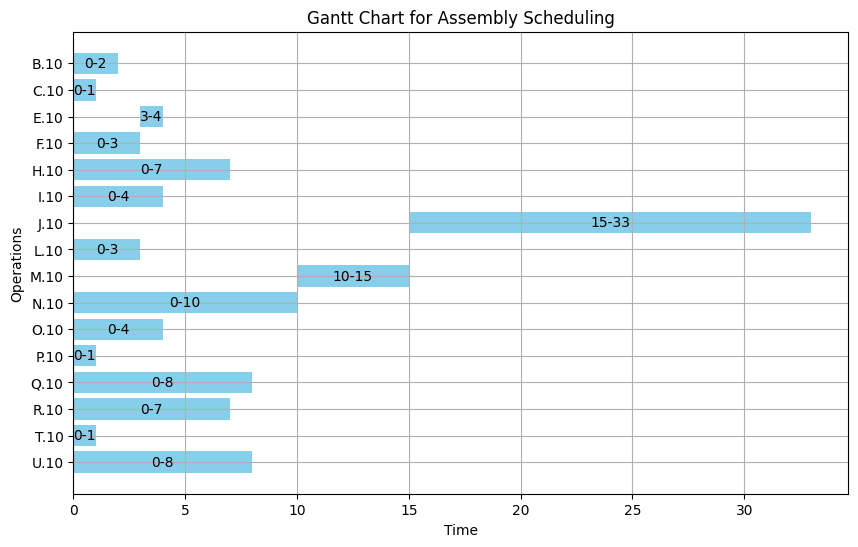

,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,B,B.10,10,"[A,P]",2,WC#1,[]
1,C,C.10,10,[A],2,WC#4,[]
2,NaN,C.20,20,[A],6,WC#2,[]
3,D,D.10,10,[A],7,WC#3,[]
4,E,E.10,10,"[A,Q]",4,WC#1,[]
5,F,F.10,10,[A],3,WC#4,[]
6,G,G.10,10,[B],18,WC#1,[B.10]
7,H,H.10,10,"[G,P]",2,WC#3,[G.10]
8,I,I.10,10,"[C,D,E,F]",4,WC#2,"[C.10, D.10, E.10, F.10]"
9,J,J.10,10,"[H,I]",2,WC#2,"[H.10, I.10]"


{'B.10': 20, 'C.10': 19, 'C.20': 18, 'D.10': 17, 'E.10': 16, 'F.10': 15, 'G.10': 14, 'H.10': 13, 'I.10': 12, 'J.10': 11, 'K.10': 10, 'L.10': 9, 'L.20': 8, 'N.10': 7, 'O.10': 6}
Operation O.10: Start Time = 0, End Time = 4, Components Required = [M]
Operation N.10: Start Time = 0, End Time = 2, Components Required = [L,K]
Operation L.20: Start Time = 0, End Time = 3, Components Required = [K,M,R]
Operation L.10: Start Time = 0, End Time = 1, Components Required = [K,M]
Operation K.10: Start Time = 0, End Time = 102, Components Required = [J]
Operation J.10: Start Time = 0, End Time = 2, Components Required = [H,I]
Operation I.10: Start Time = 0, End Time = 4, Components Required = [C,D,E,F]
Operation H.10: Start Time = 0, End Time = 2, Components Required = [G,P]
Operation G.10: Start Time = 0, End Time = 18, Components Required = [B]
Operation F.10: Start Time = 0, End Time = 3, Components Required = [A]
Operation E.10: Start Time = 0, End Time = 4, Components Required = [A,Q]
Operatio

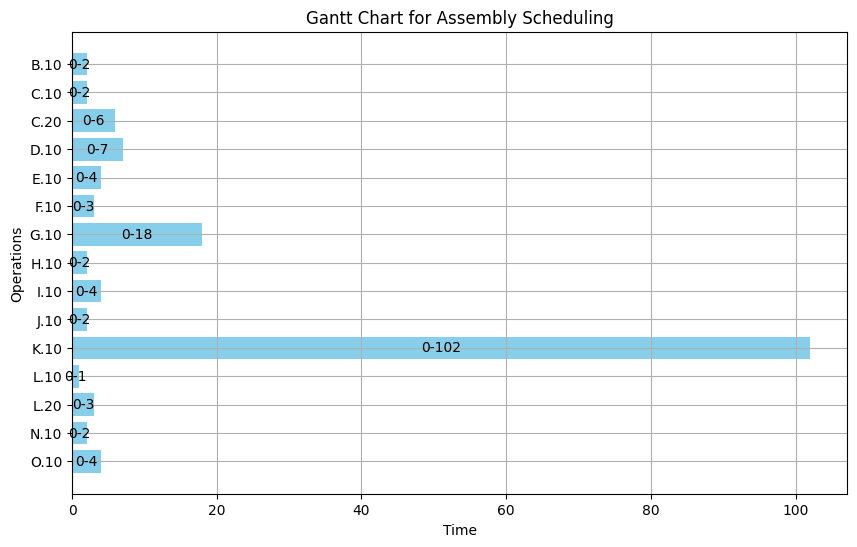

,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,B,B.10,10,"[A,Z]",5,WC#1,[]
1,C,C.10,10,[B],20,WC#2,[B.10]
2,E,E.10,10,"[C,D,F]",19,WC#3,"[C.10, F.10]"
3,F,F.10,10,[B],6,WC#3,[B.10]
4,G,G.10,10,"[E,AA]",15,WC#4,[E.10]
5,H,H.10,10,"[G,Z]",15,WC#1,[G.10]
6,I,I.10,10,"[G,H]",26,WC#3,"[G.10, H.10]"
7,J,J.10,10,[I],0,WC#2,[I.10]
8,K,K.10,10,"[J,AA]",20,WC#1,[J.10]
9,L,L.10,10,"[K,Z]",20,WC#3,[K.10]


{'B.10': 20, 'C.10': 19, 'E.10': 18, 'F.10': 17, 'G.10': 16, 'H.10': 15, 'I.10': 14, 'J.10': 13, 'K.10': 12, 'L.10': 11, 'M.10': 10, 'O.10': 9, 'Q.10': 8, 'S.10': 7, 'T.10': 6, 'V.10': 5, 'W.10': 4, 'Y.10': 3}
Operation Y.10: Start Time = 0, End Time = 16, Components Required = [Q,S]
Operation W.10: Start Time = 0, End Time = 14, Components Required = [V,X,AB]
Operation V.10: Start Time = 0, End Time = 19, Components Required = [U]
Operation T.10: Start Time = 0, End Time = 198, Components Required = [A,S]
Operation S.10: Start Time = 0, End Time = 8, Components Required = [Q]
Operation Q.10: Start Time = 0, End Time = 24, Components Required = [O,R]
Operation O.10: Start Time = 0, End Time = 9, Components Required = [M,P]
Operation M.10: Start Time = 0, End Time = 102, Components Required = [K,L,N]
Operation L.10: Start Time = 0, End Time = 20, Components Required = [K,Z]
Operation K.10: Start Time = 0, End Time = 20, Components Required = [J,AA]
Operation J.10: Start Time = 0, End Ti

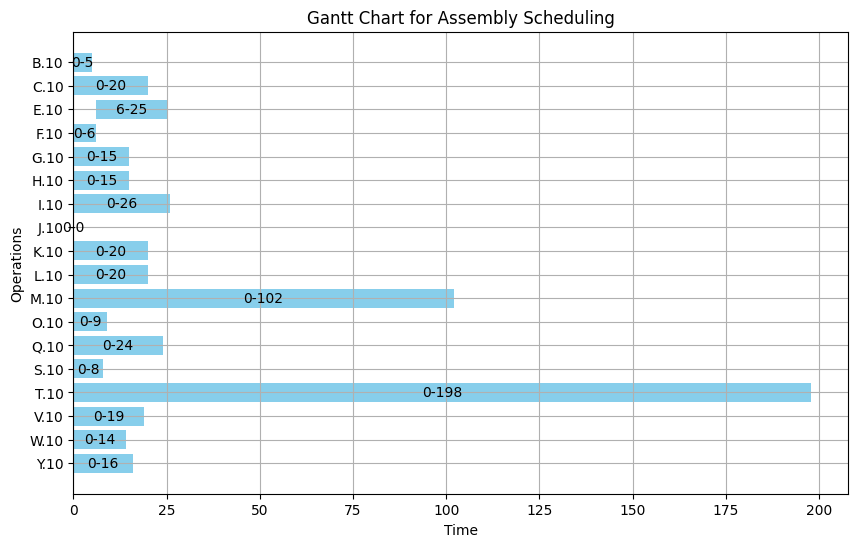

,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,P1,P1.10,10,"[A, B, C, D]",45,WC#1,[]
1,P2,P2.10,10,"[P1, E]",30,WC#2,[]
2,P3,P3.10,10,"[P2, F, G]",25,WC#3,[]
3,P4,P4.10,10,"[P3, H, I, J]",40,WC#1,[]
4,P5,P5.10,10,"[P4, K, L]",55,WC#2,[]
5,P6,P6.10,10,"[P5, M]",35,WC#3,[]
6,P7,P7.10,10,"[P6, N, O]",20,WC#4,[]
7,P8,P8.10,10,"[P7, P]",15,WC#1,[]
8,P9,P9.10,10,"[P8, Q, R]",50,WC#2,[]
9,P10,P10.10,10,"[P9, S, T]",60,WC#3,[]


{'P1.10': 20, 'P2.10': 19, 'P3.10': 18, 'P4.10': 17, 'P5.10': 16, 'P6.10': 15, 'P7.10': 14, 'P8.10': 13, 'P9.10': 12, 'P10.10': 11, 'P11.10': 10, 'P12.10': 9, 'P13.10': 8, 'P14.10': 7, 'P15.10': 6, 'P16.10': 5, 'P17.10': 4, 'P18.10': 3, 'P19.10': 2, 'P20.10': 1, 'P21.10': 0, 'P22.10': -1, 'P23.10': -2, 'P24.10': -3, 'P25.10': -4, 'P26.10': -5, 'P27.10': -6, 'P28.10': -7, 'P29.10': -8, 'P30.10': -9}
Operation P30.10: Start Time = 0, End Time = 15, Components Required = [P29, NNN, OOO, PPP, QQQ]
Operation P29.10: Start Time = 0, End Time = 20, Components Required = [P28, LLL, MMM]
Operation P28.10: Start Time = 0, End Time = 35, Components Required = [P27, JJJ, KKK]
Operation P27.10: Start Time = 0, End Time = 55, Components Required = [P26, HHH, III]
Operation P26.10: Start Time = 0, End Time = 40, Components Required = [P25, FFF, GGG]
Operation P25.10: Start Time = 0, End Time = 25, Components Required = [P24, CCC, DDD, EEE]
Operation P24.10: Start Time = 0, End Time = 20, Components R

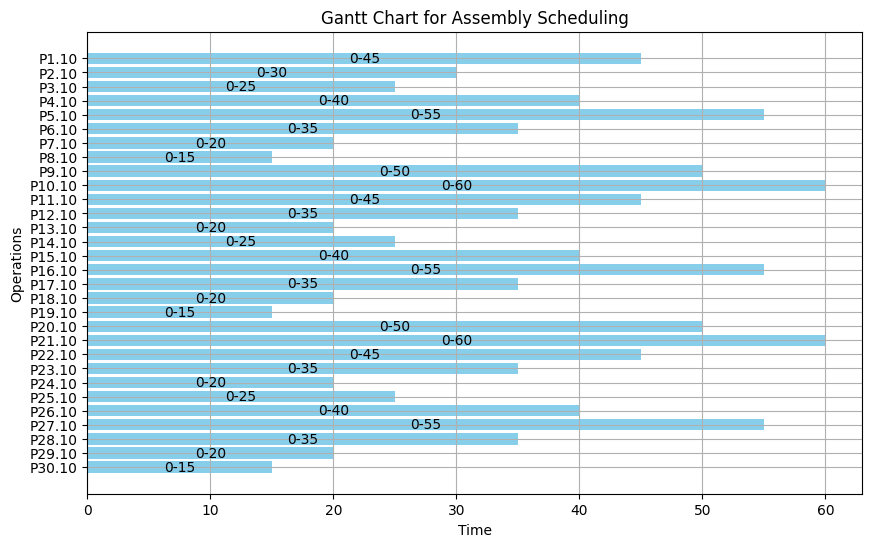

,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,Lasagna,Lasagna.10,10,"[Tomato Sauce, Cheese, Noodles, Ground Beef, B...",45,WC#4,[]
1,Tomato Sauce,Tomato Sauce.10,10,"[Tomatoes, Olive Oil, Garlic]",20,WC#1,[]
2,Cheese,Cheese.10,10,"[Milk, Rennet]",30,WC#2,[]
3,Noodles,Noodles.10,10,"[Flour, Eggs, Salt]",25,WC#3,[]
4,Ground Beef,Ground Beef.10,10,"[Beef, Seasoning]",15,WC#2,[]
5,Bechamel Sauce,Bechamel Sauce.10,10,"[Butter, Flour, Milk, Nutmeg]",35,WC#1,[]
6,Tomatoes,Tomatoes.10,10,[None],10,WC#1,[]
7,Olive Oil,Olive Oil.10,10,[Olives],15,WC#3,[]
8,Garlic,Garlic.10,10,[None],10,WC#1,[]
9,Milk,Milk.10,10,[None],15,WC#2,[]


{'Lasagna.10': 20, 'Tomato Sauce.10': 19, 'Cheese.10': 18, 'Noodles.10': 17, 'Ground Beef.10': 16, 'Bechamel Sauce.10': 15, 'Tomatoes.10': 14, 'Olive Oil.10': 13, 'Garlic.10': 12, 'Milk.10': 11, 'Rennet.10': 10, 'Flour.10': 9, 'Eggs.10': 8, 'Salt.10': 7, 'Beef.10': 6, 'Seasoning.10': 5, 'Butter.10': 4, 'Nutmeg.10': 3, 'Olives.10': 2, 'Cream.10': 1}
Operation Cream.10: Start Time = 0, End Time = 20, Components Required = [None]
Operation Olives.10: Start Time = 0, End Time = 20, Components Required = [None]
Operation Nutmeg.10: Start Time = 0, End Time = 10, Components Required = [None]
Operation Butter.10: Start Time = 0, End Time = 15, Components Required = [Cream]
Operation Seasoning.10: Start Time = 0, End Time = 10, Components Required = [None]
Operation Beef.10: Start Time = 0, End Time = 20, Components Required = [None]
Operation Salt.10: Start Time = 0, End Time = 10, Components Required = [None]
Operation Eggs.10: Start Time = 0, End Time = 10, Components Required = [None]
Oper

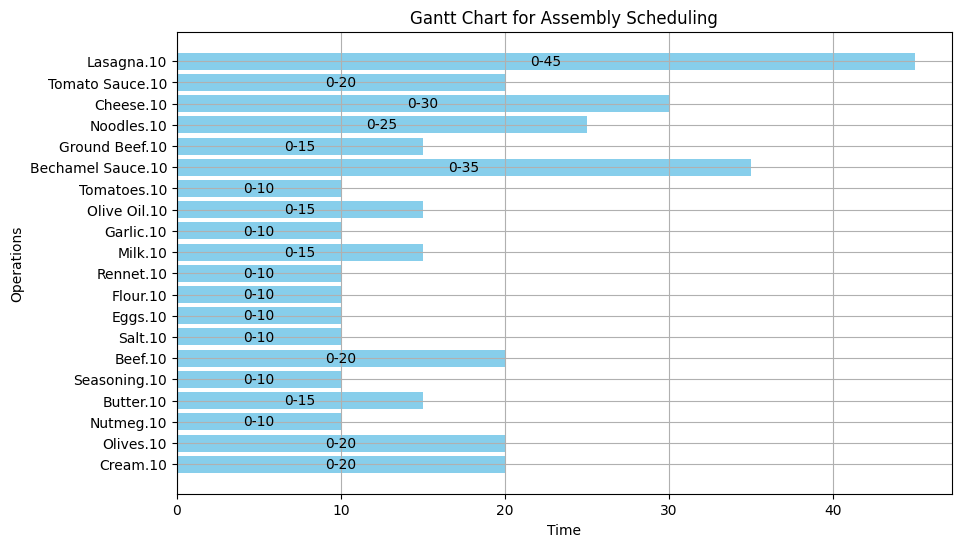

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

class Operation:
    def __init__(self, id, processing_time, workcenter, predecessor_operations=None, components_required=None):
        self.id = id
        self.processing_time = processing_time
        self.workcenter = workcenter
        self.predecessor_operations = predecessor_operations if predecessor_operations else []
        self.components_required = components_required if components_required else []
        self.start_time = None
        self.end_time = None
        self.scheduled = False

def schedule_operations(operations, due_dates):
    """
    Schedule operations based on their dependencies and processing times.
    
    Args:
    - operations (dict): Dictionary of operations, where keys are operation IDs and values are Operation objects.
    - due_dates (dict): Dictionary of due dates for each operation ID.
    
    Returns:
    - list: List of scheduled Operation objects with start and end times.
    """
    scheduled_operations = []

    # Sort operations by due date (Earliest Due Date first)
    sorted_operations = sorted(operations.values(), key=lambda op: due_dates[op.id])

    # Dictionary to track the earliest start time for each operation
    start_times = {}

    for operation in sorted_operations:
        if not operation.predecessor_operations:
            # If no predecessors, start immediately
            operation.start_time = 0
        else:
            # Calculate start time based on predecessors' end times
            max_end_time = 0
            for pred_id in operation.predecessor_operations:
                if pred_id in start_times:
                    max_end_time = max(max_end_time, start_times[pred_id] + operations[pred_id].processing_time)

            operation.start_time = max_end_time

        # Calculate end time based on start time and processing time
        operation.end_time = operation.start_time + operation.processing_time
        operation.scheduled = True

        # Update start time for the current operation
        start_times[operation.id] = operation.start_time

        scheduled_operations.append(operation)

    return scheduled_operations


def plot_gantt_chart(scheduled_operations):
    """
    Plots a Gantt chart for the scheduled operations.
    
    Inputs:
    - scheduled_operations (list Operation()): A list of scheduled Operation objects.
    
    Output:
    - Displays a Gantt chart.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    for op in scheduled_operations:
        ax.barh(op.id, op.processing_time, left=op.start_time, color='skyblue')
        ax.text(op.start_time + op.processing_time / 2, op.id, f'{op.start_time}-{op.end_time}', ha='center', va='center', color='black')

    ax.set_xlabel('Time')
    ax.set_ylabel('Operations')
    ax.set_title('Gantt Chart for Assembly Scheduling')
    plt.grid(True)
    plt.show()

def load_operations_from_df(df):
    """
    Loads operations from a DataFrame and creates Operation objects.    
    Inputs:
        - df: pandas DataFrame - A DataFrame containing BOM information with columns 
          ['part', 'operation', 'operation_id', 'components_required', 'processing_time', 'workcenter', 'predecessor_operations'].
    Output:
        - operations: dictionary, {operation_id: Operation()} - A dictionary of Operation objects.
    """
    operations = {}
    for idx, row in df.iterrows():
        operation_id = row['operation']
        successors = row['predecessor_operations']
        components_required = row['components_required']  # Assuming 'components_required' is a list in the DataFrame
        operations[operation_id] = Operation(operation_id, row['processing_time'], row['workcenter'], successors, components_required)
    return operations

def load_due_dates(df):
    """
    Generates due dates for each operation.    
    Inputs:
        - df: pandas DataFrame - A DataFrame containing BOM information.
    Output:
        - due_dates: dictionary, {operation_id: int} - A dictionary of due dates for each operation.
    """
    due_dates = {}
    for idx, row in df.iterrows():
        operation_id = row['operation']
        # Example due date assignment, this should be adjusted as per actual due dates
        due_dates[operation_id] = 20 - idx  # Example: descending due dates
    return due_dates

# Assuming dict_df and its keys are defined as in your previous code
for df_key in dict_df.keys():
    df = dict_df[df_key]
    display(df)
    operations = load_operations_from_df(df)
    due_dates = load_due_dates(df)
    print(due_dates)

    scheduled_operations = schedule_operations(operations, due_dates)

    for op in scheduled_operations:
        print(f"Operation {op.id}: Start Time = {op.start_time}, End Time = {op.end_time}, Components Required = {op.components_required}")

    plot_gantt_chart(scheduled_operations)


In [11]:
x = []
if not x:
    print("TRUE")

TRUE
